In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import itertools as it

In [2]:
def square_maze(size):
    return np.ones((size, size))

def ring_maze(s):
    maze = np.zeros([s,s])
    maze[0] = 1
    maze[:,0] = 1
    maze[-1] = 1
    maze[:,-1] = 1
    return maze

def path_maze(s):
    maze = np.zeros([s,s])
    maze[0] = 1
    maze[:,0] = 1
    maze[-1] = 1
    maze[:,-1] = 1
    maze[0,0] = 0

    return maze


def make_matrix_from(maze):
    
    def in_maze(s):
        return s[0] >= 0 and s[0] < maze.shape[0] and s[1] >= 0 and s[1] < maze.shape[1]

    def is_free(s):
        return maze[s[0],s[1]] == 1

    def valid_state(s):
        return in_maze(s) and is_free(s)
    
    states = [np.array(s) for s in it.product(range(maze.shape[0]), range(maze.shape[1])) if maze[s[0], s[1]] == 1]
    adja = np.eye(len(states))
    idx = np.zeros(maze.shape, dtype=np.int)
    c = 0
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                continue
            idx[i, j] = c
            c += 1
    
    for i, state in enumerate(states):
        possible_next_states = [state + d for d in np.array([[1,0],[-1,0],[0,1],[0,-1]])]
        filtered = list(filter(valid_state, possible_next_states))
        for f in filtered:
            adja[i, idx[f[0], f[1]]] = 1
            adja[idx[f[0], f[1]], i] = 1
    return adja, idx


In [3]:
sz = 16
maze = np.ones([sz]*2)
adj,idx_mtx = make_matrix_from(maze)
T = adj/np.sum(adj,axis=0)

In [4]:
gamma = 0.95
SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)

In [5]:
pos = 0

In [6]:
M = np.zeros(SR.shape)#np.abs(np.random.normal(size=SR.shape))#np.zeros(SR.shape)

In [14]:
#params 

alpha = .1
lamda = .95

In [15]:
pos = 0

e = np.zeros(len(SR))
rg = np.arange(len(SR))
walk_path = []

for i in range(25000):
    
    e[pos] = lamda*gamma*e[pos] + 1
    e[np.isin(rg,pos)==False] = lamda*gamma*e[pos]

    options = np.where(T[:,pos])[0]

    newP = np.random.choice(options,p=T[:,pos][options])
    walk_path.append(newP)
    zrs = np.zeros(len(SR))
    zrs[pos] = 1.
    M[pos,:] = M[pos,:] + alpha*(zrs + gamma*M[newP,:] - M[pos,:])*e
    #M = (M + M.T)/2.
    pos = newP.copy()

In [16]:
M

array([[2.63077386e+00, 1.01139204e+00, 6.08587128e-01, ...,
        6.69779131e-09, 2.83499484e-09, 1.09772928e-09],
       [2.29728819e+00, 2.69282849e+00, 1.09961449e+00, ...,
        2.99611555e-09, 1.23236282e-09, 5.05575256e-10],
       [5.59963516e-01, 1.03861132e+00, 2.82740314e+00, ...,
        1.60454668e-08, 7.43983723e-09, 3.00551370e-09],
       ...,
       [1.24270112e-09, 5.03825172e-09, 1.50771269e-08, ...,
        2.95273794e+00, 1.03393077e+00, 3.86061883e-01],
       [6.19056288e-10, 2.81156941e-09, 9.33826191e-09, ...,
        1.63803131e+00, 3.32276002e+00, 6.47721533e-01],
       [2.46546908e-10, 1.15340859e-09, 4.01621708e-09, ...,
        7.56634333e-01, 1.83033747e+00, 2.72961660e+00]])

(14, 100)

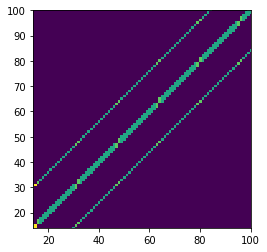

In [33]:
plt.imshow(T,interpolation='None')
plt.xlim(14,100)
plt.ylim(14,100)

(14, 33)

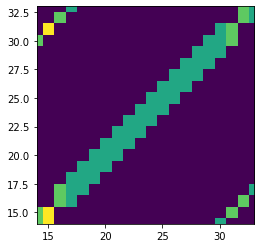

In [32]:
plt.imshow(T,interpolation='None')
plt.xlim(14,33)
plt.ylim(14,33)

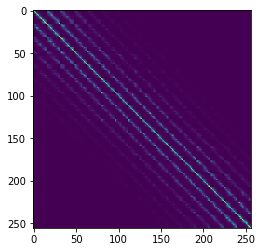

In [18]:
plt.imshow(M)

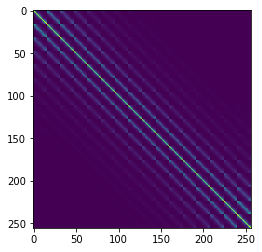

In [19]:
plt.imshow(SR)

In [20]:
V,E = np.linalg.eig(M)


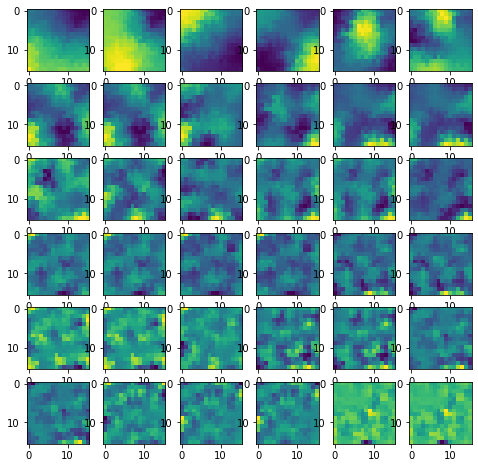

In [21]:
plt.figure(figsize=(8,8))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(E[:,i].reshape(sz,sz).real)